In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from tabulate import tabulate
from IPython.display import display, Markdown

set =pd.read_csv('Data RSL.csv') 
set.head(5)

GOV            Level of government    TAX               Revenue category  \
0  FED  Federal or Central government  TOTAL  Total tax and non-tax revenue   
1  FED  Federal or Central government  TOTAL  Total tax and non-tax revenue   
2  FED  Federal or Central government  TOTAL  Total tax and non-tax revenue   
3  FED  Federal or Central government  TOTAL  Total tax and non-tax revenue   
4  FED  Federal or Central government  TOTAL  Total tax and non-tax revenue   

    YEA  Year Unit Code  Unit  PowerCode Code PowerCode  \
0  2004  2004       LSL  Loti               6  Millions   
1  2005  2005       LSL  Loti               6  Millions   
2  2006  2006       LSL  Loti               6  Millions   
3  2007  2007       LSL  Loti               6  Millions   
4  2008  2008       LSL  Loti               6  Millions   

   Reference Period Code  Reference Period     Value  Flag Codes  Flags  
0                    NaN               NaN  4001.294         NaN    NaN  
1                    NaN               NaN  4437.224         NaN    NaN  
2                    NaN               NaN  6344.029         NaN    NaN  
3                    NaN               NaN  6775.955         NaN    NaN  
4                    NaN               NaN  8280.234         NaN    NaN

In [32]:
set.columns


Index(['GOV', 'Level of government', 'TAX', 'Revenue category', 'YEA', 'Year',
       'Unit Code', 'Unit', 'PowerCode Code', 'PowerCode',
       'Reference Period Code', 'Reference Period', 'Value', 'Flag Codes',
       'Flags'],
      dtype='object')

In [33]:
set['Revenue category'].unique()


array(['Total tax and non-tax revenue', 'Total tax revenue',
       '1000 Taxes on income, profits and capital gains',
       '1100 Taxes on income, profits and capital gains of individuals',
       '1110 On income and profits of individuals', 'Personal income tax',
       'Withholding tax', '1120 On capital gains of individuals',
       '1200 Taxes on income, profits and capital gains of corporates',
       '1210 On profits of corporates', 'Corporate income tax',
       'Gambling levy', '1220 On capital gains of corporates',
       '1300 Unallocable between 1100 and 1200',
       '2000 Social security contributions (SSC)',
       '3000 Taxes on payroll and workforce',
       '5000 Taxes on goods and services',
       '5100 Taxes on production, sale, transfer, etc',
       '5110 General taxes on goods and services',
       '5111 Value added taxes', 'VAT on imports', 'VAT - Domestic (Net)',
       '5112 Sales tax', '5113 Other (than value added and sales tax)',
       '5120 Taxes on spe

In [34]:
set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GOV                    1728 non-null   object 
 1   Level of government    1728 non-null   object 
 2   TAX                    1728 non-null   object 
 3   Revenue category       1728 non-null   object 
 4   YEA                    1728 non-null   int64  
 5   Year                   1728 non-null   int64  
 6   Unit Code              1728 non-null   object 
 7   Unit                   1728 non-null   object 
 8   PowerCode Code         1728 non-null   int64  
 9   PowerCode              1728 non-null   object 
 10  Reference Period Code  0 non-null      float64
 11  Reference Period       0 non-null      float64
 12  Value                  1728 non-null   float64
 13  Flag Codes             0 non-null      float64
 14  Flags                  0 non-null      float64
dtypes: f

In [35]:
data = set [['Revenue category','Year','Value']]

In [36]:
data.drop_duplicates()

Revenue category  Year     Value
0     Total tax and non-tax revenue  2004  4001.294
1     Total tax and non-tax revenue  2005  4437.224
2     Total tax and non-tax revenue  2006  6344.029
3     Total tax and non-tax revenue  2007  6775.955
4     Total tax and non-tax revenue  2008  8280.234
...                             ...   ...       ...
1687       VAT - Domestic (Refunds)  2017  -631.698
1688       VAT - Domestic (Refunds)  2018  -681.585
1689       VAT - Domestic (Refunds)  2019  -866.652
1690       VAT - Domestic (Refunds)  2020  -722.489
1691       VAT - Domestic (Refunds)  2021  -860.203

[864 rows x 3 columns]

In [37]:
#checking for missing values
data.isnull().sum()

Revenue category    0
Year                0
Value               0
dtype: int64

In [38]:
# identifying outliers
column_name = 'Value'

# Calculate Q1, Q3, and IQR for the value column
Q1 = data[column_name].quantile(0.25)
Q3 = data[column_name].quantile(0.75)
IQR = Q3 - Q1

# Defining the threshold for outliers
threshold = 1.5

# Identifying outliers from the value column
outliers = (data[column_name] < (Q1 - threshold * IQR)) | (data[column_name] > (Q3 + threshold * IQR))

outliers

0       False
1       False
2        True
3        True
4        True
        ...  
1723    False
1724    False
1725    False
1726    False
1727    False
Name: Value, Length: 1728, dtype: bool

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Revenue category  1728 non-null   object 
 1   Year              1728 non-null   int64  
 2   Value             1728 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 40.6+ KB


In [40]:
outliers.sum()

198

In [41]:
data['Revenue category'].nunique()

48

In [42]:
from sklearn.preprocessing import LabelEncoder

# Initializing the LabelEncoder
label_encoder = LabelEncoder()

# Fitting and transform the 'Revenue category' column
data.loc[:, 'Revenue category'] = label_encoder.fit_transform(data['Revenue category'])

# Printing the mapping between original categories and encoded labels
print("Mapping of original categories to encoded labels:")
for category, label in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{category}: {label}")

Mapping of original categories to encoded labels:
1000 Taxes on income, profits and capital gains: 0
1100 Taxes on income, profits and capital gains of individuals: 1
1110 On income and profits of individuals: 2
1120 On capital gains of individuals: 3
1200 Taxes on income, profits and capital gains of corporates: 4
1210 On profits of corporates: 5
1220 On capital gains of corporates: 6
1300 Unallocable between 1100 and 1200: 7
2000 Social security contributions (SSC): 8
3000 Taxes on payroll and workforce: 9
5000 Taxes on goods and services: 10
5100 Taxes on production, sale, transfer, etc: 11
5110 General taxes on goods and services: 12
5111 Value added taxes: 13
5112 Sales tax: 14
5113 Other (than value added and sales tax): 15
5120 Taxes on specific goods and services: 16
5130 Unallocable between 5110 and 5120: 17
5200 Taxes on use of goods and perform activities: 18
5300 Unallocable between 5100 and 5200: 19
6000 Taxes other than 1000, 2000, 3000, 4000 and 5000: 20
Corporate income

In [43]:
import pandas as pd

# Definning the mapping of original categories to encoded labels
category_mapping = {
    'Taxes on income, profits and capital gains': 0,
    'Taxes on income, profits and capital gains of individuals': 1,
    'On income and profits of individuals': 2,
    'On capital gains of individuals': 3,
    'Taxes on income, profits and capital gains of corporates': 4,
    'On profits of corporates': 5,
    'On capital gains of corporates': 6,
    'Unallocable between 1100 and 1200': 7,
    'Social security contributions (SSC)': 8,
    'Taxes on payroll and workforce': 9,
    'Taxes on goods and services': 10,
    'Taxes on production, sale, transfer, etc': 11,
    'General taxes on goods and services': 12,
    'Value added taxes': 13,
    'Sales tax': 14,
    'Other (than value added and sales tax)': 15,
    'Taxes on specific goods and services': 16,
    'Unallocable between 5110 and 5120': 17,
    'Taxes on use of goods and perform activities': 18,
    'Unallocable between 5100 and 5200': 19,
    'Taxes other than 1000, 2000, 3000, 4000 and 5000': 20,
    'Corporate income tax': 21,
    'Excise taxes collected on behalf of the SACU Common Revenue Pool': 22,
    'Gambling levy': 23,
    'Import duties collected on behalf of the SACU Common Revenue Pool': 24,
    'Mining and other royalties': 25,
    'Non-tax revenue: Fines, penalties and forfeits': 26,
    'Non-tax revenue: Grants': 27,
    'Non-tax revenue: Interest and dividends': 28,
    'Non-tax revenue: Miscellaneous and unidentified revenue': 29,
    'Non-tax revenue: Other property income': 30,
    'Non-tax revenue: Property income': 31,
    'Non-tax revenue: Rents and royalties': 32,
    'Non-tax revenue: Sales of goods and services': 33,
    'Personal income tax': 34,
    'SACU revenue': 35,
    'Total non-tax revenue': 36,
    'Total non-tax revenue excluding grants': 37,
    'Total tax and non-tax revenue': 38,
    'Total tax and non-tax revenue excluding grants': 39,
    'Total tax revenue': 40,
    'Total tax revenues not including social security contributions': 41,
    'VAT - Domestic (Gross)': 42,
    'VAT - Domestic (Net)': 43,
    'VAT - Domestic (Refunds)': 44,
    'VAT on imports': 45,
    'Water royalties': 46,
    'Withholding tax': 47
}

# Creatting a DataFrame from the category mapping
category_df = pd.DataFrame.from_dict(category_mapping, orient='index', columns=['Encoded_Label'])

# Performming one-hot encoding
one_hot_encoded_categories = pd.get_dummies(category_df['Encoded_Label'], prefix='Category')

# linking the original categories with the one-hot encoded categories
encoded_category_mapping = pd.concat([category_df, one_hot_encoded_categories], axis=1)

print(encoded_category_mapping)


                                                    Encoded_Label  Category_0  \
Taxes on income, profits and capital gains                      0        True   
Taxes on income, profits and capital gains of i...              1       False   
On income and profits of individuals                            2       False   
On capital gains of individuals                                 3       False   
Taxes on income, profits and capital gains of c...              4       False   
On profits of corporates                                        5       False   
On capital gains of corporates                                  6       False   
Unallocable between 1100 and 1200                               7       False   
Social security contributions (SSC)                             8       False   
Taxes on payroll and workforce                                  9       False   
Taxes on goods and services                                    10       False   
Taxes on production, sale, t

In [44]:
# EXPLORATORY DATA ANALYSIS PART
data.describe()

Year         Value
count  1728.000000   1728.000000
mean   2012.500000   1650.746302
std       5.189629   2940.416337
min    2004.000000   -866.652000
25%    2008.000000      0.000000
50%    2012.500000    464.790000
75%    2017.000000   1857.219000
max    2021.000000  19131.238000

In [45]:
data


Revenue category  Year     Value
0                  38  2004  4001.294
1                  38  2005  4437.224
2                  38  2006  6344.029
3                  38  2007  6775.955
4                  38  2008  8280.234
...               ...   ...       ...
1723               44  2017  -631.698
1724               44  2018  -681.585
1725               44  2019  -866.652
1726               44  2020  -722.489
1727               44  2021  -860.203

[1728 rows x 3 columns]

In [46]:
data['Year'].unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

C:\Users\User\Documents\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


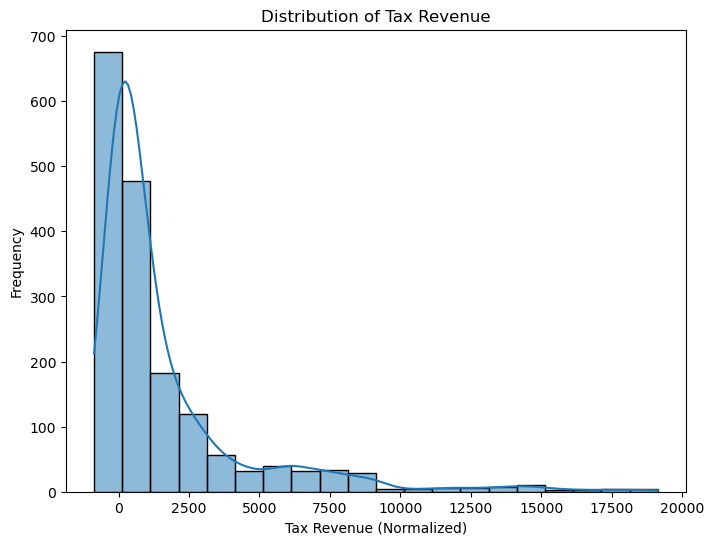

In [47]:
# Histogram for 'Value'
plt.figure(figsize=(8, 6))
sns.histplot(data['Value'], bins=20, kde=True)
plt.xlabel('Tax Revenue (Normalized)')
plt.ylabel('Frequency')
plt.title('Distribution of Tax Revenue')
plt.show()

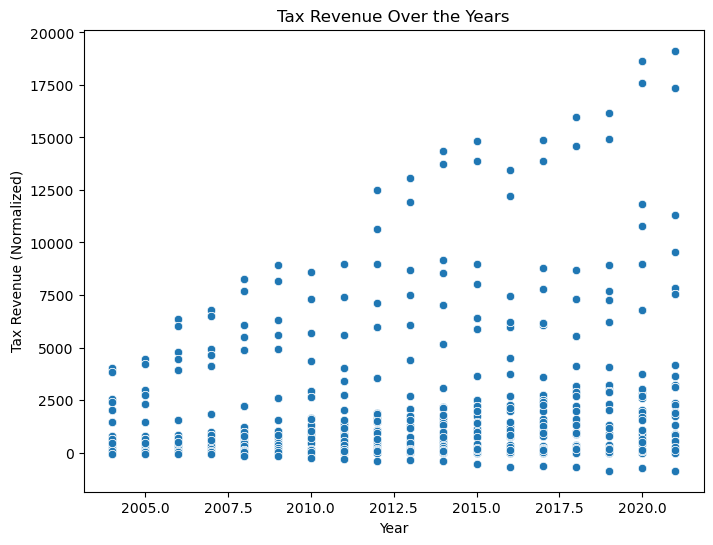

In [48]:
# Scattering plot of 'Value' vs 'Year'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Year', y='Value', data=data)
plt.xlabel('Year')
plt.ylabel('Tax Revenue (Normalized)')
plt.title('Tax Revenue Over the Years')
plt.show()

C:\Users\User\Documents\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\Documents\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\Documents\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


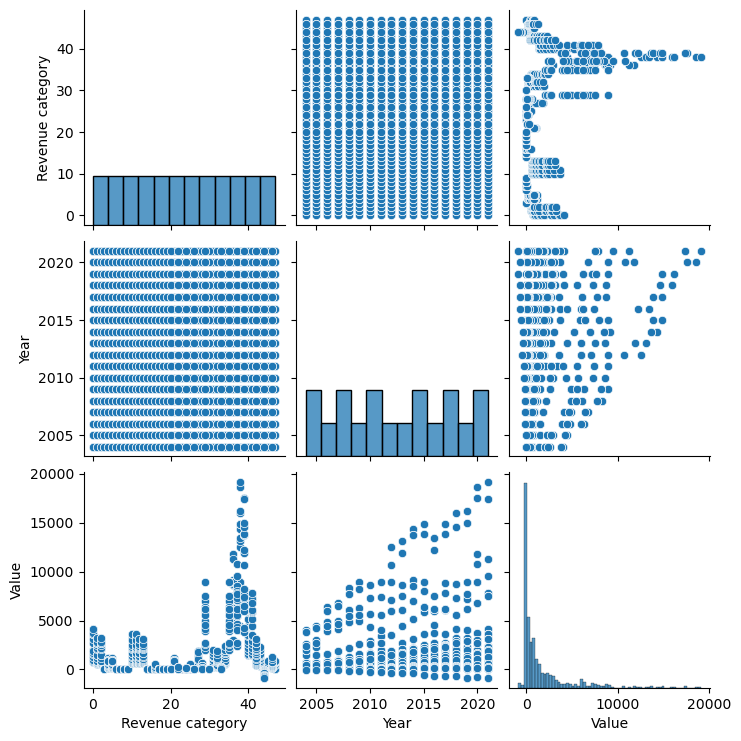

In [49]:
sns.pairplot(data)
plt.show()


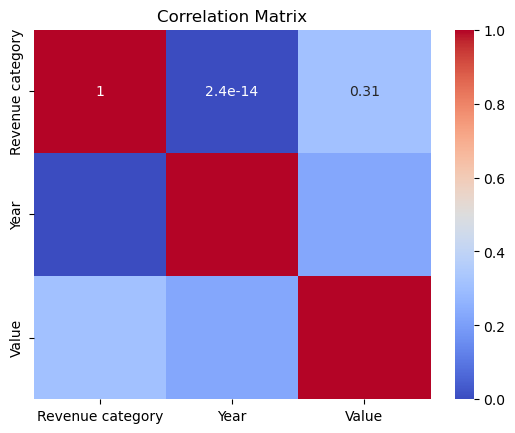

In [50]:
# Visualizing the correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


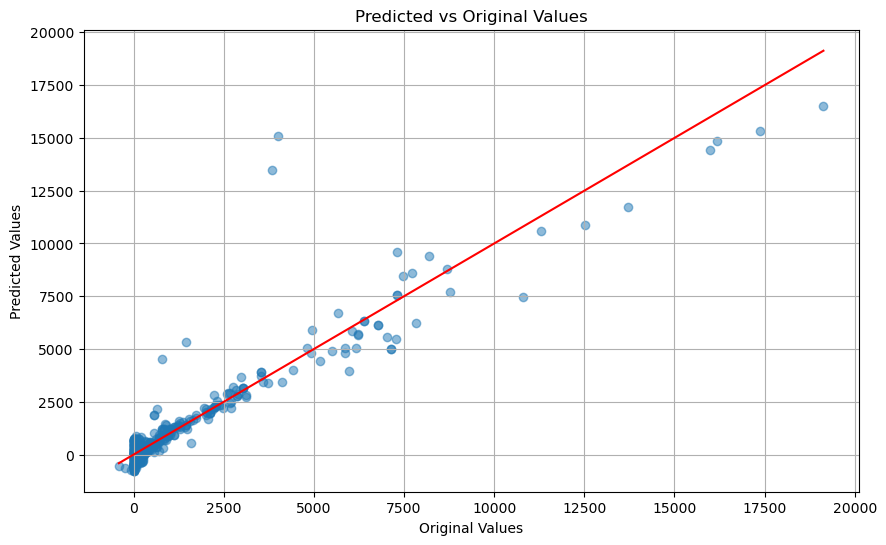

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# Ensuring y_test and y_pred are sorted and have the same size
sorted_indices = np.argsort(y_test)
y_test_sorted = y_test.iloc[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Plotting predicted vs original values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_sorted, y_pred_sorted, alpha=0.5)
plt.plot(y_test_sorted, y_test_sorted, color='red')
plt.title('Predicted vs Original Values')
plt.xlabel('Original Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

In [51]:
import pandas as pd


def feature_engineering(data):
    # Extracting temporal features
    data['Month'] = pd.to_datetime(data['Year'], format='%Y').dt.month
    data['Quarter'] = pd.to_datetime(data['Year'], format='%Y').dt.quarter
    data['Season'] = pd.to_datetime(data['Year'], format='%Y').dt.month % 12 // 3 + 1

    # Creating lagged features for tax revenue
    for lag in range(1, 4):
        data[f'Tax_Revenue_Lag_{lag}'] = data['Value'].shift(lag)

    # Encoding the 'Revenue category' using one-hot encoding
    data = pd.get_dummies(data, columns=['Revenue category'], drop_first=True)

    # Dropping the rows with missing values introduced by lagging
    data.dropna(inplace=True)

    return data

# Applying feature engineering to  DataFrame
data = feature_engineering(data)
data.head()

C:\Users\User\AppData\Local\Temp\ipykernel_1244\1035968324.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = pd.to_datetime(data['Year'], format='%Y').dt.month
C:\Users\User\AppData\Local\Temp\ipykernel_1244\1035968324.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Quarter'] = pd.to_datetime(data['Year'], format='%Y').dt.quarter
C:\Users\User\AppData\Local\Temp\ipykernel_1244\1035968324.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

Year     Value  Month  Quarter  Season  Tax_Revenue_Lag_1  \
3  2007  6775.955      1        1       1           6344.029   
4  2008  8280.234      1        1       1           6775.955   
5  2009  8915.884      1        1       1           8280.234   
6  2010  8600.519      1        1       1           8915.884   
7  2011  8974.107      1        1       1           8600.519   

   Tax_Revenue_Lag_2  Tax_Revenue_Lag_3  Revenue category_1  \
3           4437.224           4001.294               False   
4           6344.029           4437.224               False   
5           6775.955           6344.029               False   
6           8280.234           6775.955               False   
7           8915.884           8280.234               False   

   Revenue category_2  ...  Revenue category_38  Revenue category_39  \
3               False  ...                 True                False   
4               False  ...                 True                False   
5               False  ...                 True                False   
6               False  ...                 True                False   
7               False  ...                 True                False   

   Revenue category_40  Revenue category_41  Revenue category_42  \
3                False                False                False   
4                False                False                False   
5                False                False                False   
6                False                False                False   
7                False                False                False   

   Revenue category_43  Revenue category_44  Revenue category_45  \
3                False                False                False   
4                False                False                False   
5                False                False                False   
6                False                False                False   
7                False                False                False   

   Revenue category_46  Revenue category_47  
3                False                False  
4                False                False  
5                False                False  
6                False                False  
7                False                False  

[5 rows x 55 columns]

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Splitting the data into features (X) and target variable (y)
# Features
X = data.drop(columns=['Value']) 
 # Target variable
y = data['Value'] 
X

Year  Month  Quarter  Season  Tax_Revenue_Lag_1  Tax_Revenue_Lag_2  \
3     2007      1        1       1           6344.029           4437.224   
4     2008      1        1       1           6775.955           6344.029   
5     2009      1        1       1           8280.234           6775.955   
6     2010      1        1       1           8915.884           8280.234   
7     2011      1        1       1           8600.519           8915.884   
...    ...    ...      ...     ...                ...                ...   
1723  2017      1        1       1           -674.828           -566.002   
1724  2018      1        1       1           -631.698           -674.828   
1725  2019      1        1       1           -681.585           -631.698   
1726  2020      1        1       1           -866.652           -681.585   
1727  2021      1        1       1           -722.489           -866.652   

      Tax_Revenue_Lag_3  Revenue category_1  Revenue category_2  \
3              4001.294               False               False   
4              4437.224               False               False   
5              6344.029               False               False   
6              6775.955               False               False   
7              8280.234               False               False   
...                 ...                 ...                 ...   
1723           -394.026               False               False   
1724           -566.002               False               False   
1725           -674.828               False               False   
1726           -631.698               False               False   
1727           -681.585               False               False   

      Revenue category_3  ...  Revenue category_38  Revenue category_39  \
3                  False  ...                 True                False   
4                  False  ...                 True                False   
5                  False  ...                 True                False   
6                  False  ...                 True                False   
7                  False  ...                 True                False   
...                  ...  ...                  ...                  ...   
1723               False  ...                False                False   
1724               False  ...                False                False   
1725               False  ...                False                False   
1726               False  ...                False                False   
1727               False  ...                False                False   

      Revenue category_40  Revenue category_41  Revenue category_42  \
3                   False                False                False   
4                   False                False                False   
5                   False                False                False   
6                   False                False                False   
7                   False                False                False   
...                   ...                  ...                  ...   
1723                False                False                False   
1724                False                False                False   
1725                False                False                False   
1726                False                False                False   
1727                False                False                False   

      Revenue category_43  Revenue category_44  Revenue category_45  \
3                   False                False                False   
4                   False                False                False   
5                   False                False                False   
6                   False                False                False   
7                   False                False                False   
...                   ...                  ...                  ...   
1723                False            

In [59]:

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initializing and trainning the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [61]:
# Making the predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) * 100
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1051199.5497493849
R-squared: 86.86577708100735


In [4]:
from sklearn.model_selection import KFold
import numpy as np
# Defining the number of folds
k = 5

# Creating a KFold instance
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Storage for evaluation metrics
mse_scores = []
r2_scores = []

# Iterate over each fold
for train_index, test_index in kf.split(X):
    # Splitting data into train and test sets for this fold
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    # Fitting the model on the training data
    model.fit(X_train_fold, y_train_fold)
    
    # Make predictions on the test data
    y_pred_fold = model.predict(X_test_fold)
    
    # Calculate evaluation metrics for this fold
    mse_fold = mean_squared_error(y_test_fold, y_pred_fold)
    r2_fold = r2_score(y_test_fold, y_pred_fold)
    
    # Append scores to the lists
    mse_scores.append(mse_fold)
    r2_scores.append(r2_fold)

# Calculating average scores across all folds
avg_mse = np.mean(mse_scores)
avg_r2 = np.mean(r2_scores)

print("Average Mean Squared Error:", avg_mse)
print("Average R-squared:", avg_r2)


NameError: name 'mean_squared_error' is not defined

In [72]:
import joblib

# saving model
joblib.dump(model, 'tsepo.joblib')


['tsepo.joblib']

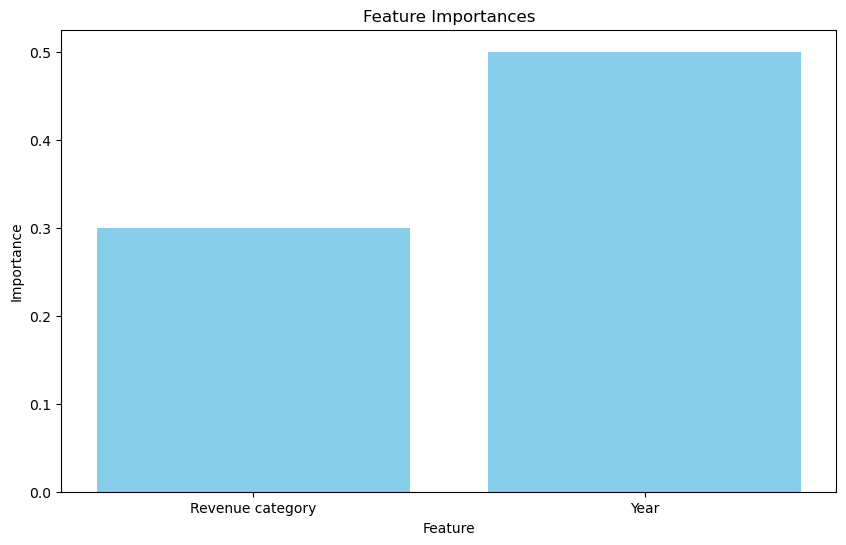

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you halist of feature importances
feature_importances_data = {
    'Feature': ['Revenue category', 'Year', 'Other Feature'],
    'Importance': [0.3, 0.5, 0.2]
}

# Creating a DataFrame from the feature importances data
feature_importance_df = pd.DataFrame(feature_importances_data)

# Filtering feature importances for 'Revenue category' and 'Year'
filtered_feature_importances = feature_importance_df[feature_importance_df['Feature'].isin(['Revenue category', 'Year'])]

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.bar(filtered_feature_importances['Feature'], filtered_feature_importances['Importance'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()


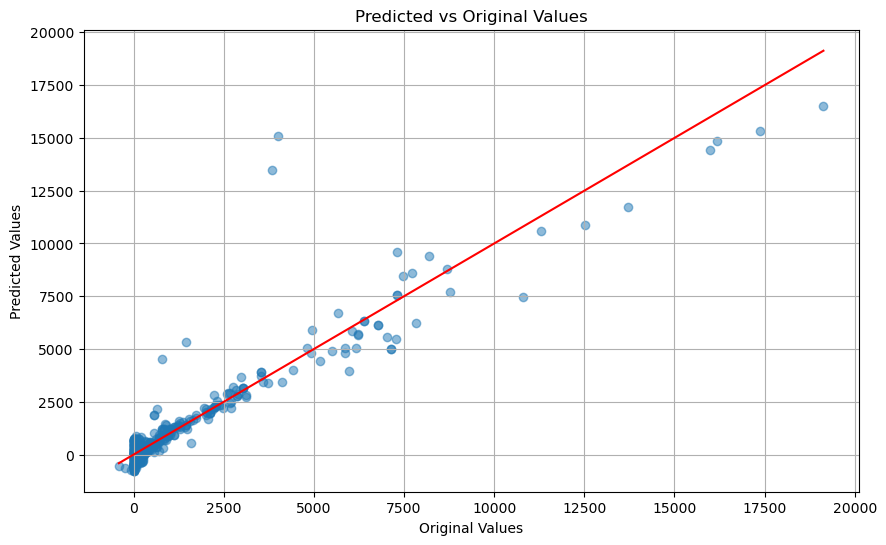

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from joblib import dump, load
import pandas as pd

# Example of dataset
data = {
    'Year': [2020, 2021, 2022, 2023],
    'Category': [1, 2, 3, 4],  # Numerical encoding of categories
    'Revenue': [1000, 1200, 1500, 1800]
}
df = pd.DataFrame(data)

# Features and target variable
X = df[['Year', 'Category']]
y = df['Revenue']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Trainning the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Save the trained model
dump(model, 'tax_revenue_trained_model.joblib')

# Load the trained model
loaded_model = load('tax_revenue_trained_model.joblib')

# Predict using the loaded model
predictions = loaded_model.predict(X_test)
print(predictions)


[1146.]


In [ ]:
pip install xgboost

In [9]:
import tkinter as tk
from tkinter import messagebox
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor

#loading dataset
data = pd.read_csv("Data RSL.csv")  # Update with your dataset file path

# Extracting  columns for prediction
selected_columns = ['Revenue category', 'Year', 'Value']
data = data[selected_columns]

label_encoder = LabelEncoder()
data['Revenue category'] = label_encoder.fit_transform(data['Revenue category'])

# Split the data into features and target variable
X = data.drop(columns=['Value'])
y = data['Value']

# Scale the numerical features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train a RandomForestRegressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_scaled, y)

window = tk.Tk()
window.title("Revenue Prediction Dashboard")

# Function to handle prediction
def predict_value():
    try:
        # Getting input values from entry fields
        revenue_category = entry_category.get()
        year = int(entry_year.get())

        # Encoding the 'Revenue category' using the LabelEncoder
        revenue_category_int = label_encoder.transform([revenue_category])[0]

        # Creating a DataFrame with the user input
        new_data = pd.DataFrame({'Revenue category': [revenue_category_int], 'Year': [year]})

        # Scaling the numerical features using the StandardScaler
        new_data_scaled = scaler.transform(new_data)

        # Making prediction
        predicted_value = model.predict(new_data_scaled)

        # Displaying predicted value
        result_label.config(text="Predicted revenue value: {:.2f}".format(predicted_value[0]))

    except Exception as e:
        messagebox.showerror("Error", str(e))

# Creating labels and entry fields for user input
label_category = tk.Label(window, text="Revenue Category:")
label_category.grid(row=0, column=0, padx=10, pady=5)
entry_category = tk.Entry(window)
entry_category.grid(row=0, column=1, padx=10, pady=5)

label_year = tk.Label(window, text="Year:")
label_year.grid(row=1, column=0, padx=10, pady=5)
entry_year = tk.Entry(window)
entry_year.grid(row=1, column=1, padx=10, pady=5)


predict_button = tk.Button(window, text="Predict", command=predict_value)
predict_button.grid(row=2, column=0, columnspan=2, padx=10, pady=10)

# Labeling to display predicted value
result_label = tk.Label(window, text="")
result_label.grid(row=3, column=0, columnspan=2, padx=10, pady=5)

window.mainloop()
